# **Correlation and Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_phones = pd.read_csv("/content/drive/MyDrive/Flipkart_mobile_brands_scraped_data.csv")
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN


In [ ]:
df_phones["Name"] = df_phones["Brand"].astype(str) +" "+df_phones["Model"].astype(str)
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Name
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
...,...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0,Xiaomi Redmi Y3
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN,Xiaomi Redmi Y3
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN,Xiaomi Redmi Y3
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN,Xiaomi Redmi Y3


In [ ]:
df_phones.shape

(2647, 9)

In [ ]:
duplicate_rows_df = df_phones[df_phones.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (107, 9)


In [ ]:
df_phones.count()

Brand             2647
Model             2645
Color             2505
Memory            2605
Storage           2568
Rating            2647
Selling Price     2644
Original Price     969
Name              2647
dtype: int64

In [ ]:
df_phones = df_phones.drop_duplicates()
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Name
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
...,...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0,Xiaomi Redmi Y3
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN,Xiaomi Redmi Y3
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN,Xiaomi Redmi Y3
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN,Xiaomi Redmi Y3


In [ ]:
df_phones.count()

Brand             2540
Model             2538
Color             2407
Memory            2501
Storage           2463
Rating            2540
Selling Price     2537
Original Price     934
Name              2540
dtype: int64

In [ ]:
print(df_phones.isnull().sum())

Brand                0
Model                2
Color              133
Memory              39
Storage             77
Rating               0
Selling Price        3
Original Price    1606
Name                 0
dtype: int64


In [ ]:
df_phones = df_phones.dropna(subset=["Model", "Memory","Storage"])
df_phones["Selling Price"] = df_phones["Selling Price"].fillna(df_phones["Original Price"])
df_phones["Original Price"] = df_phones["Original Price"].fillna(df_phones["Selling Price"])
df_phones= df_phones.dropna(subset=["Original Price","Selling Price"])
df_phones["Color"] = df_phones["Color"].fillna("Base")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(df_phones.isnull().sum())

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
Name              0
dtype: int64


In [ ]:
df_phones = df_phones[df_phones['Memory'].str.endswith('GB')]
df_phones['Memory'] = df_phones['Memory'].str.replace('GB', '').astype(float)
df_phones = df_phones[df_phones['Storage'].str.contains('^[0-9].*GB$')]
df_phones['Storage'] = df_phones['Storage'].str.replace('GB', '').astype(float)
df_phones = df_phones[df_phones['Rating'] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_phones.describe()

,Memory,Storage,Rating,Selling Price,Original Price
count,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000
mean,4.162403,83.641846,4.236912,24820.741434,26979.160347
std,2.261424,80.937489,0.269112,24506.682891,26858.042082
min,0.500000,4.000000,2.300000,2799.000000,2799.000000
25%,3.000000,32.000000,4.100000,9999.000000,10999.000000
50%,4.000000,64.000000,4.300000,15490.000000,16990.000000
75%,6.000000,128.000000,4.400000,27999.000000,30780.000000
max,16.000000,512.000000,5.000000,157999.000000,189999.000000


,Memory,Storage,Rating,Selling Price,Original Price
Memory,1.000000,0.629071,0.321410,0.320008,0.358150
Storage,0.629071,1.000000,0.436402,0.691371,0.681705
Rating,0.321410,0.436402,1.000000,0.452775,0.437401
Selling Price,0.320008,0.691371,0.452775,1.000000,0.976003
Original Price,0.358150,0.681705,0.437401,0.976003,1.000000


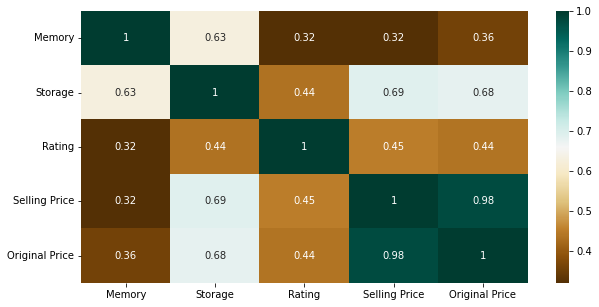

In [ ]:
plt.figure(figsize=(10, 5))
c = df_phones.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

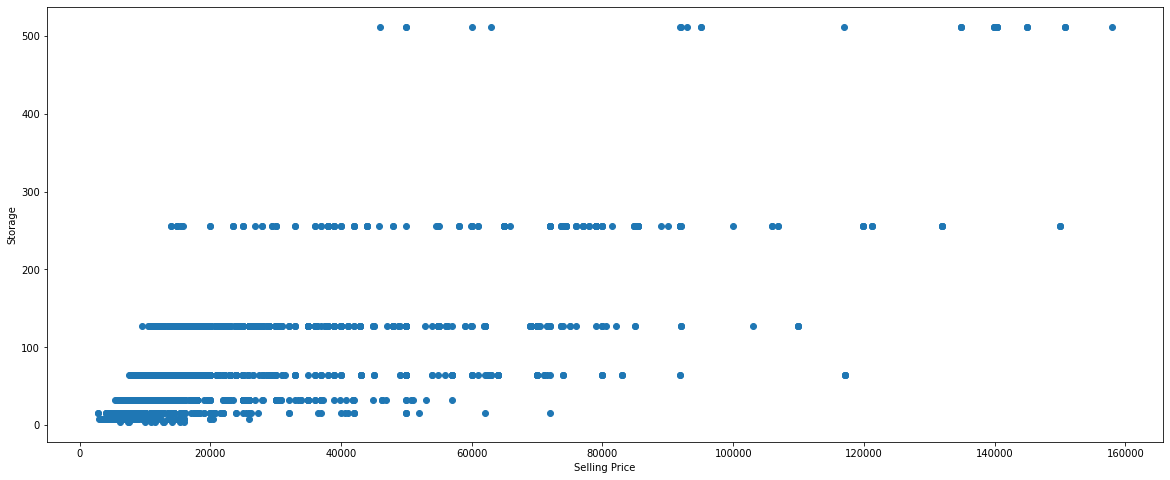

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(df_phones['Selling Price'], df_phones['Storage'])
ax.set_xlabel('Selling Price')
ax.set_ylabel('Storage')
plt.show()

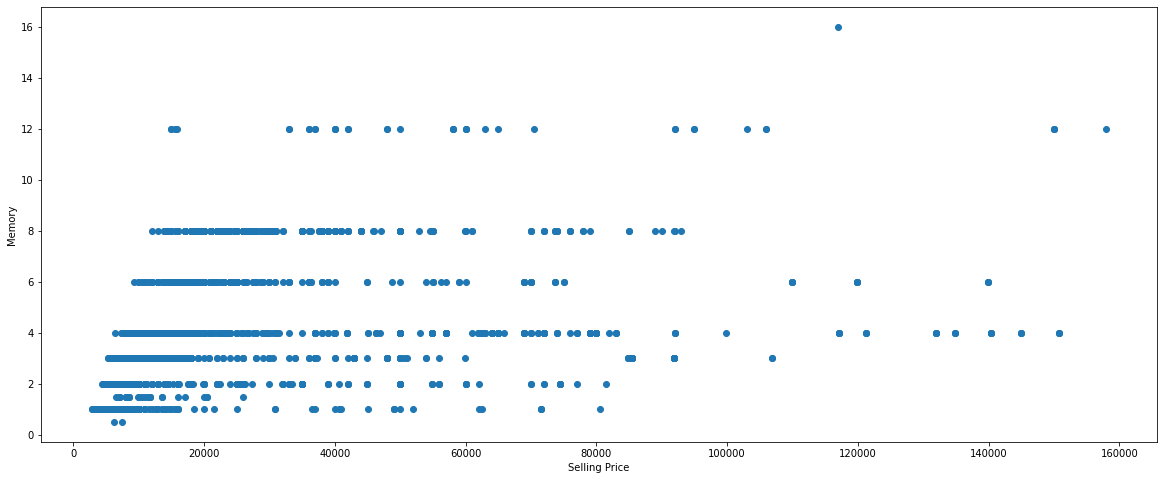

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(df_phones['Selling Price'], df_phones['Memory'])
ax.set_xlabel('Selling Price')
ax.set_ylabel('Memory')
plt.show()

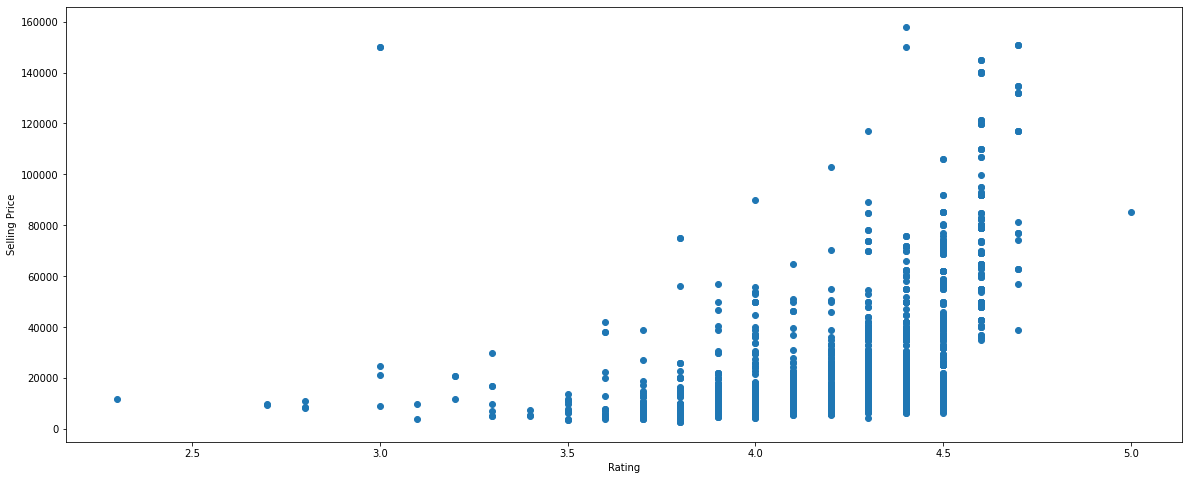

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(df_phones['Rating'], df_phones['Selling Price'])
ax.set_xlabel('Rating')
ax.set_ylabel('Selling Price')
plt.show()

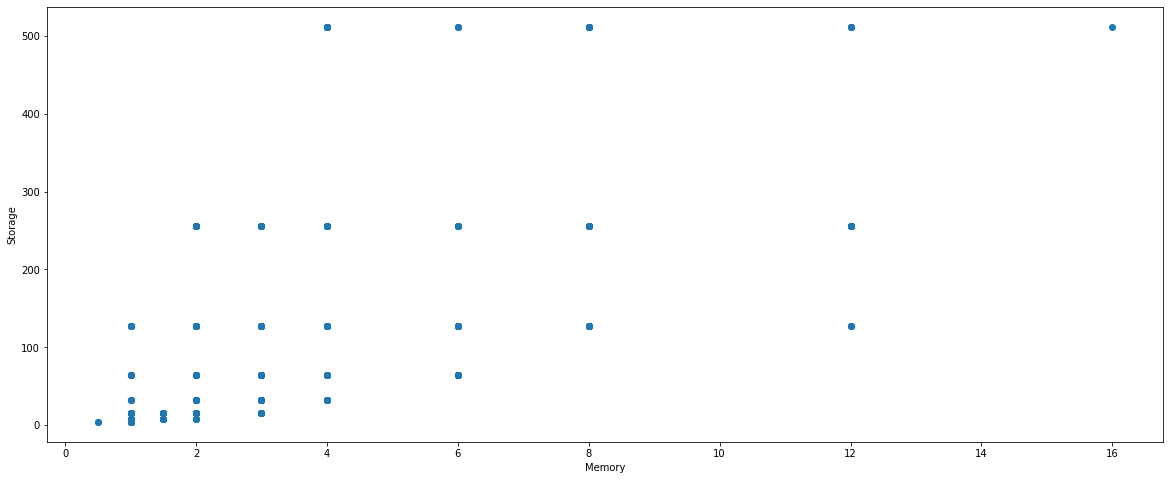

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(df_phones['Memory'], df_phones['Storage'])
ax.set_xlabel('Memory')
ax.set_ylabel('Storage')
plt.show()

In [ ]:
X = df_phones['Rating'].values.reshape(-1, 1)
y = df_phones['Selling Price'].values.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[-140615.9860851]
[[38993.81352265]]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred

,Actual,Predicted
0,35990.0,30956.793415
1,10990.0,30956.793415
2,32990.0,27057.412062
3,74400.0,34856.174767
4,13999.0,30956.793415
...,...,...
433,7990.0,27057.412062
434,10499.0,27057.412062
435,19499.0,30956.793415
436,6999.0,7560.505301


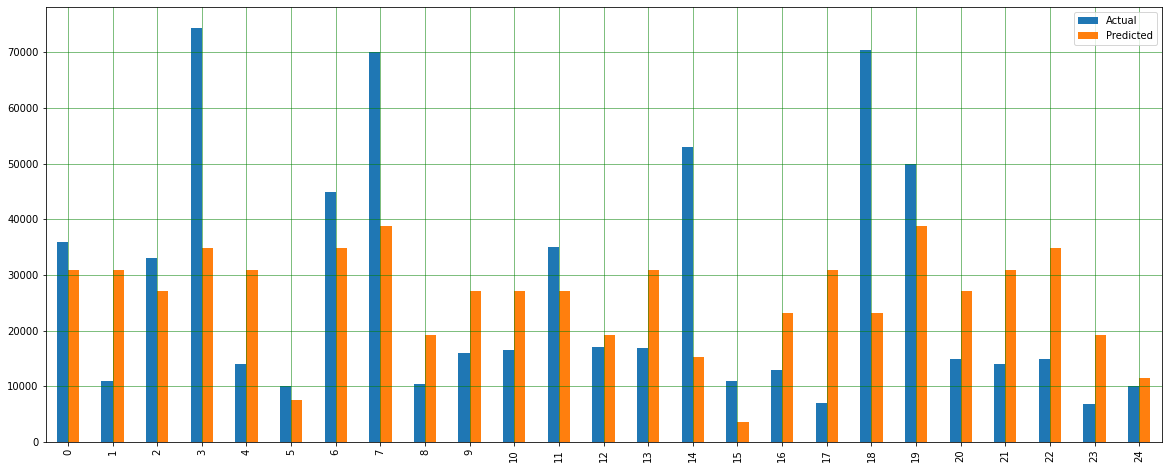

In [ ]:
df1 = df_pred.head(25)
df1.plot(kind='bar',figsize=(20, 8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

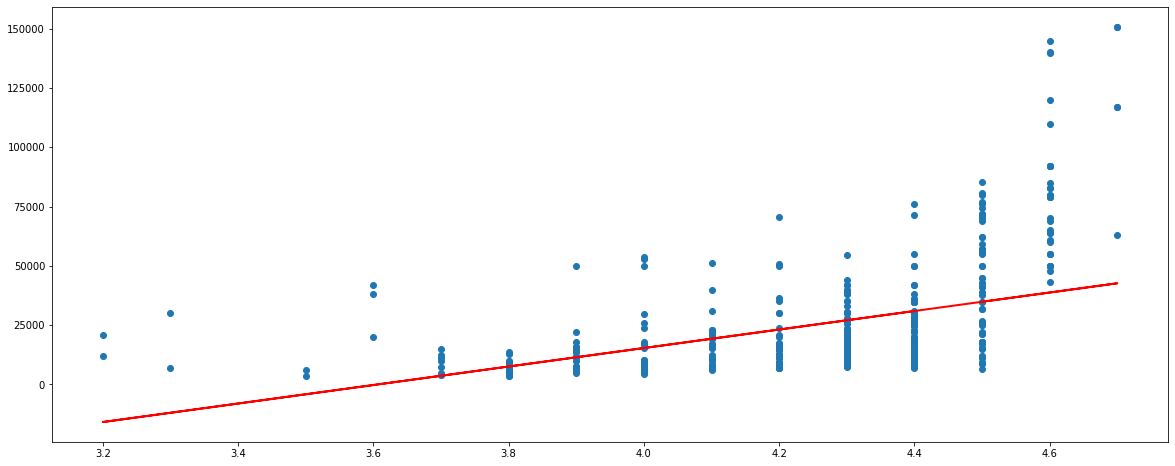

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
r_sq = regressor.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.25218898685136426


In [ ]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: [-140615.9860851]
slope: [[38993.81352265]]


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15130.299756336022
Mean Squared Error: 474562981.7514144
Root Mean Squared Error: 21784.466524370397


,Memory,Storage,Rating,Selling Price,Original Price
Memory,1.000000,0.820081,0.371479,0.538852,0.560446
Storage,0.820081,1.000000,0.551103,0.679909,0.700704
Rating,0.371479,0.551103,1.000000,0.584789,0.586940
Selling Price,0.538852,0.679909,0.584789,1.000000,0.976407
Original Price,0.560446,0.700704,0.586940,0.976407,1.000000


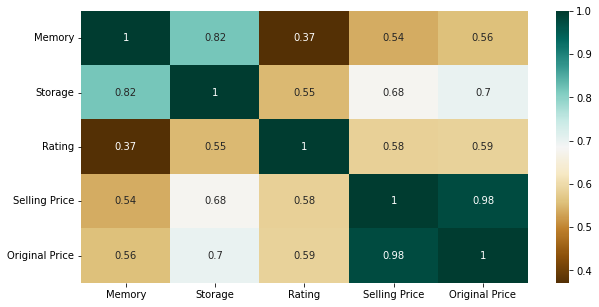

In [ ]:
plt.figure(figsize=(10, 5))
c = df_phones.corr('spearman')
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     564.0
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          4.20e-111
Time:                        10:34:40   Log-Likelihood:                -24978.
No. Observations:                2189   AIC:                         4.996e+04
Df Residuals:                    2187   BIC:                         4.997e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.499e+05   7371.108    -20.333      0.0